In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd "drive/My Drive"

/content/drive/My Drive


In [0]:
fea = []
for i in range(1,785):
  fea.append(str(i))
X = pd.read_csv('train_p1.csv', usecols = fea)
y = pd.read_csv('train_p1.csv', usecols= ['Label'])
test_fea = [str(i) for i in range(0,784)]
X_test_t = pd.read_csv('testX_p1.csv', usecols=test_fea)

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.1,random_state = 42)

In [0]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_std = False)
#X =scalar.fit_transform(X)
X_train = scalar.fit_transform(X_train)
#X_test_t = scalar.transform(X_test_t)
X_val = scalar.transform(X_val)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
pca = PCA(n_components = 85, random_state = 42)
X_r = pca.fit_transform(X_train)
X_val_r = pca.transform(X_val)

In [7]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
import time
depth = [3,5,7,9,11]
n = [50,100,150,200,250]
acc = []
t = []
t_t = []
for a in depth:
  for b in n:
    model = RandomForestClassifier(max_depth = a, n_estimators = b)
    start = time.time()
    model.fit(X_r,y_train)
    end = time.time()
    start_t = time.time()
    y_pred = model.predict(X_val_r)
    end_t = time.time() 
    accuracy = accuracy_score(y_val, y_pred)
    acc.append(accuracy)
    t.append(end - start)
    t_t.append(end_t - start_t)
acc = np.reshape(acc, (5,5))
t = np.reshape(t, (5,5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6

Text(69.0, 0.5, 'Parameter: Max - Depth')

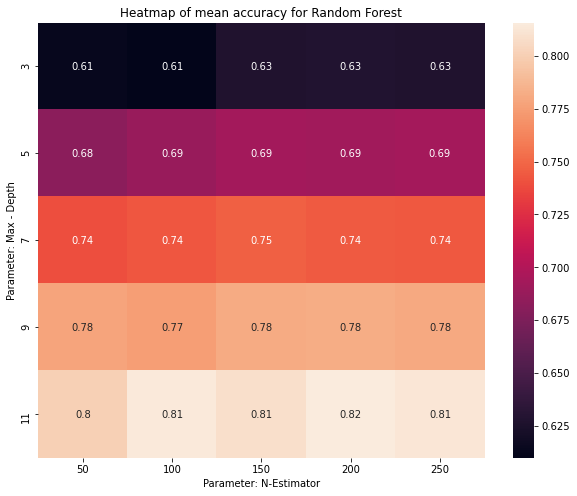

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(acc, xticklabels = n, yticklabels = depth, annot = True)
plt.title('Heatmap of mean accuracy for Random Forest')
plt.xlabel('Parameter: N-Estimator')
plt.ylabel('Parameter: Max - Depth')

In [13]:
acc

array([[0.6135    , 0.60983333, 0.62716667, 0.62783333, 0.62683333],
       [0.68216667, 0.68816667, 0.69283333, 0.6925    , 0.69416667],
       [0.73933333, 0.743     , 0.747     , 0.74433333, 0.74333333],
       [0.77866667, 0.77483333, 0.7815    , 0.782     , 0.7805    ],
       [0.80116667, 0.81433333, 0.80866667, 0.81566667, 0.81283333]])

Text(69.0, 0.5, 'Parameter: Max - Depth')

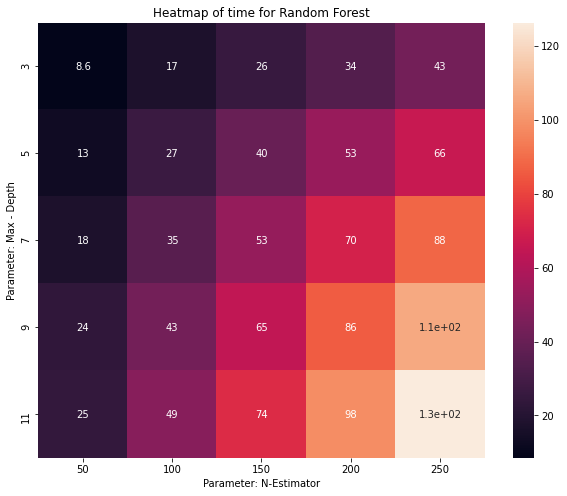

In [9]:
plt.figure(figsize = (10,8))
sns.heatmap(t, xticklabels = n, yticklabels = depth, annot = True)
plt.title('Heatmap of time for Random Forest')
plt.xlabel('Parameter: N-Estimator')
plt.ylabel('Parameter: Max - Depth')

In [12]:
t

array([[  8.5583992 ,  17.29662395,  25.64674234,  34.19509363,
         43.143121  ],
       [ 13.47821498,  26.77240682,  40.10112929,  53.16750455,
         66.33306789],
       [ 17.71356177,  35.2703135 ,  52.57682753,  70.27613688,
         88.21977615],
       [ 23.50170565,  43.22614717,  64.54785156,  85.97507191,
        106.29635167],
       [ 24.5383184 ,  48.85474467,  73.68225265,  98.15668917,
        126.16742206]])

Text(33.0, 0.5, 'Parameter: Max - Depth')

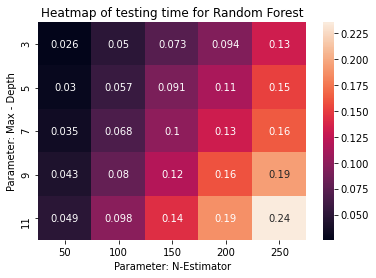

In [10]:
t_t = np.reshape(t_t, (5,5))
sns.heatmap(t_t, xticklabels = n, yticklabels = depth, annot = True)
plt.title('Heatmap of testing time for Random Forest')
plt.xlabel('Parameter: N-Estimator')
plt.ylabel('Parameter: Max - Depth')

In [11]:
t_t

array([[0.02561259, 0.04962587, 0.07267904, 0.09441376, 0.13248062],
       [0.0301795 , 0.05720496, 0.09058285, 0.11378145, 0.15189123],
       [0.03507376, 0.06798863, 0.10052991, 0.1315093 , 0.16315675],
       [0.04251862, 0.08017278, 0.11859131, 0.15937138, 0.19371319],
       [0.04882598, 0.09842849, 0.14355254, 0.18758082, 0.23550034]])